In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("brca_data_w_subtypes.csv")
data

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363,vital.status,PR.Status,ER.Status,HER2.Final.Status,histological.type
0,0.892818,6.580103,14.123672,10.606501,13.189237,6.649466,10.520335,10.338490,10.248379,10.229970,...,-0.691766,-0.337863,-0.178503,0.011638,-0.207257,0,Positive,Positive,Negative,infiltrating ductal carcinoma
1,0.000000,3.691311,17.116090,15.517231,9.867616,9.691667,8.179522,7.911723,1.289598,1.818891,...,0.279067,0.292925,-0.155242,-0.089365,0.267530,0,Positive,Negative,Negative,infiltrating ductal carcinoma
2,3.748150,4.375255,9.658123,5.326983,12.109539,11.644307,10.517330,5.114925,11.975349,11.911437,...,0.219910,0.308110,-0.190794,-0.222150,-0.198518,0,Positive,Positive,Negative,infiltrating ductal carcinoma
3,0.000000,18.235519,18.535480,14.533584,14.078992,8.913760,10.557465,13.304434,8.205059,9.211476,...,-0.266554,-0.079871,-0.463237,0.522998,-0.046902,0,Positive,Positive,Negative,infiltrating ductal carcinoma
4,0.000000,4.583724,15.711865,12.804521,8.881669,8.430028,12.964607,6.806517,4.294341,5.385714,...,-0.441542,-0.152317,0.511386,-0.096482,0.037473,0,Positive,Positive,Negative,infiltrating ductal carcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0.000000,5.004281,12.817877,10.854036,11.293350,4.143573,0.926986,5.818401,12.950524,12.552395,...,-0.993249,0.131803,-0.012965,0.306601,0.344012,0,NaN,NaN,NaN,infiltrating lobular carcinoma
701,2.241901,4.867086,8.875779,5.641164,11.940968,3.149715,4.101322,9.272752,5.335362,6.974459,...,-0.502791,-0.674763,0.165243,-0.338279,0.487583,1,NaN,NaN,NaN,infiltrating lobular carcinoma
702,3.260718,6.700652,14.299072,8.443970,12.312343,11.846810,2.148544,10.435503,3.498442,8.011837,...,0.669064,0.110822,-0.170345,-0.232004,-0.165477,1,NaN,NaN,NaN,infiltrating lobular carcinoma
703,11.766777,6.656791,13.638154,10.618453,13.775750,6.649667,7.340151,9.903519,9.922855,9.360980,...,0.053346,-0.455617,-0.219365,-0.103807,-0.109356,0,NaN,NaN,NaN,infiltrating lobular carcinoma


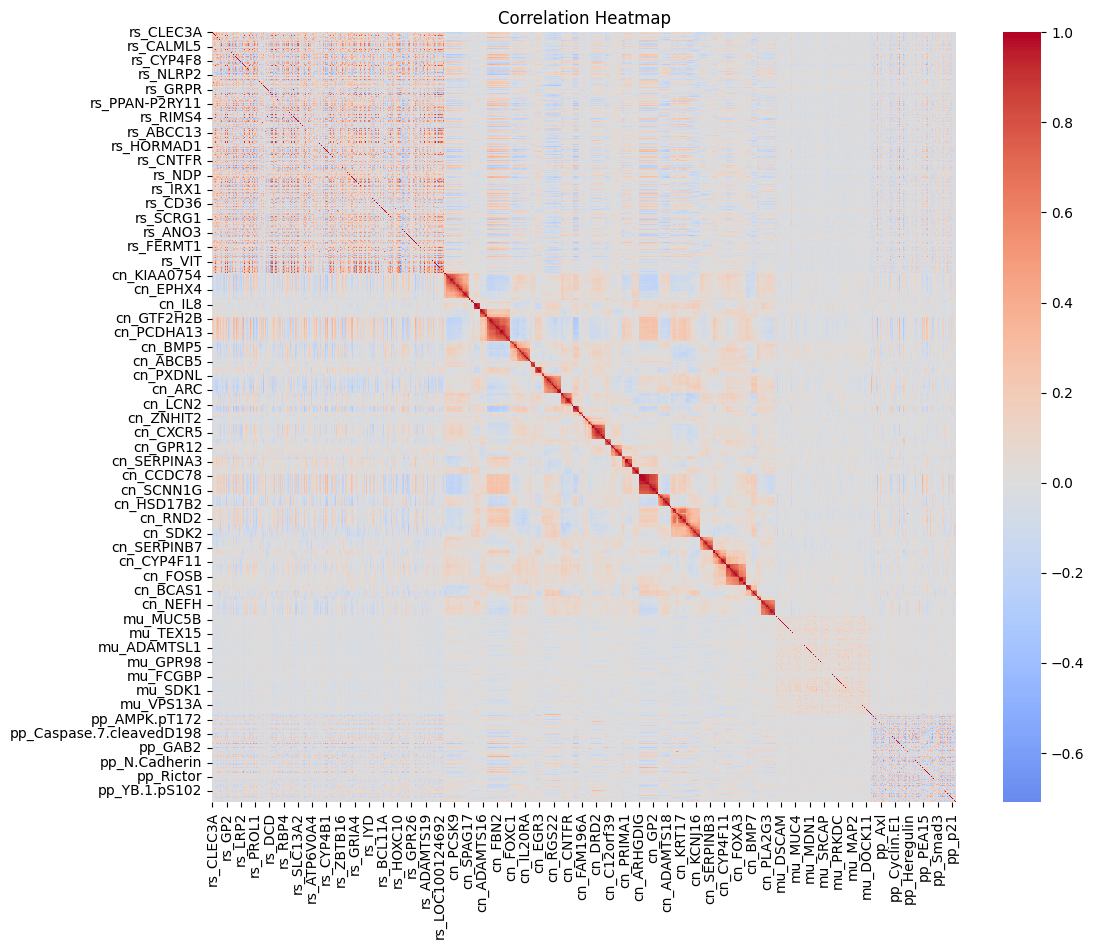

In [9]:
# Get the correlation matrix
corr_matrix = data.iloc[:,:-5].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [10]:
corr_matrix = data.iloc[:,:-5].corr().abs()

# Keep the upper triangle only (to avoid duplicate pairs)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify columns with correlation greater than threshold (e.g., 0.7) and drop them
to_drop = [column for column in upper.columns if any(upper[column] >= 0.7)]
reduced_data = data.drop(columns=to_drop)

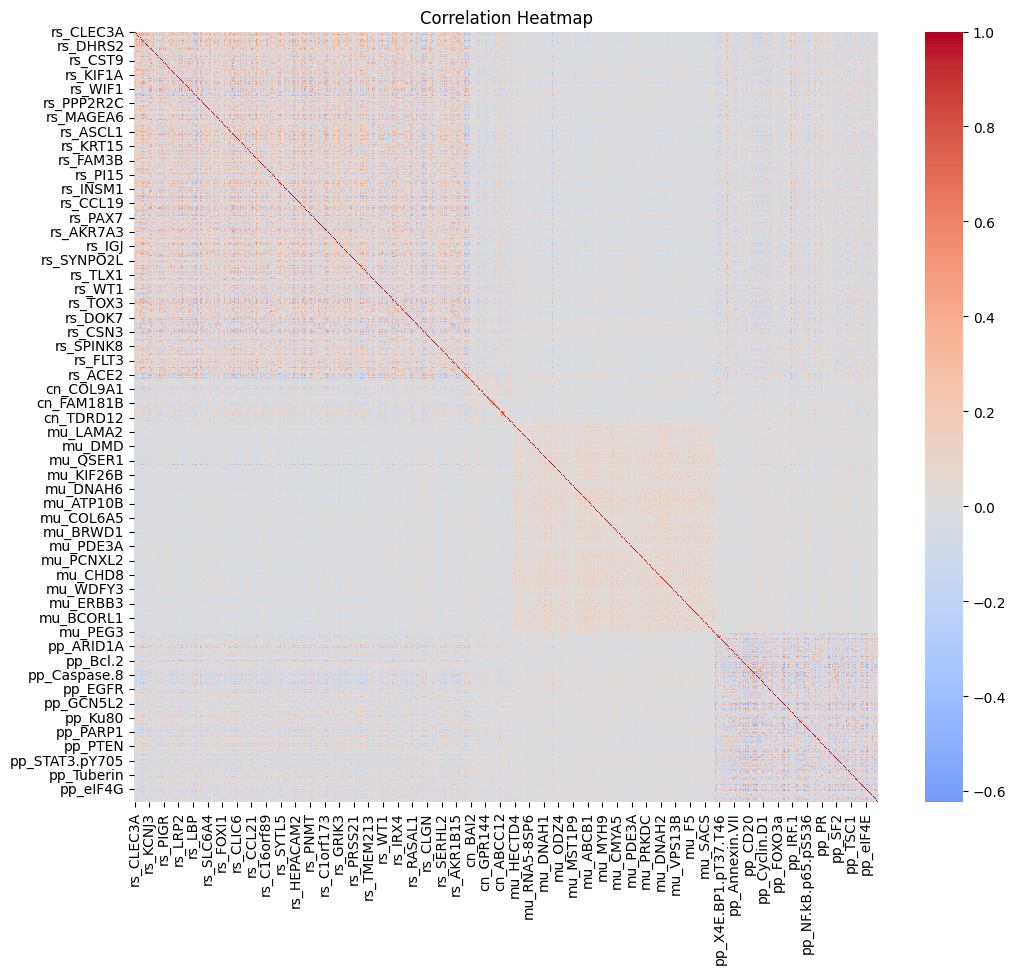

In [11]:
corr_matrix = reduced_data.iloc[:,:-5].corr()

plt.figure(figsize=(12, 10))  # You may need bigger if 1941 columns are shown
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
print(data.iloc[:,:-5].shape)
print(reduced_data.iloc[:,:-5].shape)

(705, 1936)
(705, 916)


In [13]:
data_encoded = pd.get_dummies(data, columns=['histological.type'])

In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = reduced_data.iloc[:,:-5].copy()
y = data_encoded['histological.type_infiltrating ductal carcinoma'].copy()  # Assume you have a target variable

print(f"Initial shape: {X.shape}")

# Standardization
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
print(f"After scaling: {X.shape}")

# One-Hot Encoding (for categorical features)
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop first to avoid dummy trap

if cat_cols:  # If there are any categorical columns
    encoded_cat = encoder.fit_transform(X[cat_cols])
    encoded_cat_cols = encoder.get_feature_names_out(cat_cols)
    encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoded_cat_cols)

    X = pd.concat([X.drop(columns=cat_cols).reset_index(drop=True), encoded_cat_df.reset_index(drop=True)], axis=1)
    print(f"After one-hot encoding: {X.shape}")

# Optional Feature Selection with Random Forest
feature_selector = RandomForestRegressor(n_estimators=100, random_state=42)
feature_selector.fit(X, y)
importances = feature_selector.feature_importances_
importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
important_features = importance_df.sort_values('importance', ascending=False).head(500)['feature']  # keep top 500
X = X[important_features]

print(f"After feature selection: {X.shape}")

print(f"Final shape: {X.shape}")


Initial shape: (705, 916)
After scaling: (705, 916)
After feature selection: (705, 500)
Final shape: (705, 500)


In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier  # Make sure you have xgboost installed
import warnings
warnings.filterwarnings('ignore')



# Train/Test split (90%/10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [5, 10, None]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5, 10, 15]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1]
        }
    }
}

# Training
best_models = {}
for model_name, config in models.items():
    print(f"\nTraining {model_name}...")
    clf = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train, y_train)
    best_models[model_name] = clf.best_estimator_
    print(f"Best Params for {model_name}: {clf.best_params_}")
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {model_name}: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Overall best model
best_model_name = max(best_models, key=lambda name: accuracy_score(y_test, best_models[name].predict(X_test)))
print(f"\n🏆 Best overall model: {best_model_name} with Test Accuracy: {accuracy_score(y_test, best_models[best_model_name].predict(X_test)):.4f}")


Train shape: (634, 500), Test shape: (71, 500)

Training RandomForest...
Best Params for RandomForest: {'max_depth': 10, 'n_estimators': 100}
Test Accuracy for RandomForest: 0.9296
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.92      1.00      0.96        58

    accuracy                           0.93        71
   macro avg       0.96      0.81      0.86        71
weighted avg       0.94      0.93      0.92        71


Training LogisticRegression...
Best Params for LogisticRegression: {'C': 0.1, 'solver': 'lbfgs'}
Test Accuracy for LogisticRegression: 0.9014
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.93      0.95      0.94        58

    accuracy                           0.90        71
   macro avg       0.84      0.82      0.83        71
weighted avg       0.90      0.90      0.90        71


Training SVM...
Best 

## Neural network

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.10, random_state=42, stratify=y)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a simple Neural Network
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )
    
    def forward(self, x):
        return self.net(x)

# Model, Loss, Optimizer
input_dim = X_train.shape[1]
output_dim = len(np.unique(y))

model = SimpleNN(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 60
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluate on test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f"\n Test Accuracy: {test_accuracy:.4f}")


Epoch 1/60, Loss: 0.4254, Accuracy: 0.8091
Epoch 2/60, Loss: 0.2432, Accuracy: 0.9259
Epoch 3/60, Loss: 0.1507, Accuracy: 0.9464
Epoch 4/60, Loss: 0.0884, Accuracy: 0.9685
Epoch 5/60, Loss: 0.0467, Accuracy: 0.9842
Epoch 6/60, Loss: 0.0226, Accuracy: 0.9968
Epoch 7/60, Loss: 0.0113, Accuracy: 1.0000
Epoch 8/60, Loss: 0.0056, Accuracy: 1.0000
Epoch 9/60, Loss: 0.0032, Accuracy: 1.0000
Epoch 10/60, Loss: 0.0022, Accuracy: 1.0000
Epoch 11/60, Loss: 0.0017, Accuracy: 1.0000
Epoch 12/60, Loss: 0.0013, Accuracy: 1.0000
Epoch 13/60, Loss: 0.0011, Accuracy: 1.0000
Epoch 14/60, Loss: 0.0009, Accuracy: 1.0000
Epoch 15/60, Loss: 0.0008, Accuracy: 1.0000
Epoch 16/60, Loss: 0.0007, Accuracy: 1.0000
Epoch 17/60, Loss: 0.0006, Accuracy: 1.0000
Epoch 18/60, Loss: 0.0005, Accuracy: 1.0000
Epoch 19/60, Loss: 0.0004, Accuracy: 1.0000
Epoch 20/60, Loss: 0.0004, Accuracy: 1.0000
Epoch 21/60, Loss: 0.0004, Accuracy: 1.0000
Epoch 22/60, Loss: 0.0003, Accuracy: 1.0000
Epoch 23/60, Loss: 0.0003, Accuracy: 1.00

In [26]:
model.eval()

with torch.no_grad():
    y_pred = model(X_test_tensor)
    _, y_pred_labels = torch.max(y_pred, dim=1)

# Accuracy
accuracy = accuracy_score(y_test_tensor.cpu().numpy(), y_pred_labels.cpu().numpy())
print(f"\nTest Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_tensor.cpu().numpy(), y_pred_labels.cpu().numpy()))


Test Accuracy: 0.9577

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.98      0.97      0.97        58

    accuracy                           0.96        71
   macro avg       0.92      0.94      0.93        71
weighted avg       0.96      0.96      0.96        71



## Foundation model (TabPFN)

In [27]:
from tabpfn import TabPFNClassifier


feature_selector = RandomForestRegressor(n_estimators=100, random_state=42)
feature_selector.fit(X, y)
importances = feature_selector.feature_importances_
importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
important_features = importance_df.sort_values('importance', ascending=False).head(100)['feature']  # keep top 500
X = X[important_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (634, 100), Test shape: (71, 100)


In [19]:
clf = TabPFNClassifier()
clf.fit(X_train, y_train)

TabPFNClassifier()

In [20]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy for TabPFN: {acc:.4f}")
print(classification_report(y_test, y_pred))

/Users/aarefeen/miniconda3/envs/Z/lib/python3.8/site-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Test Accuracy for TabPFN: 0.9437
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.97      0.97      0.97        58

    accuracy                           0.94        71
   macro avg       0.91      0.91      0.91        71
weighted avg       0.94      0.94      0.94        71



## Reduced dimension plot using tsne

New shape after t-SNE: (705, 2)


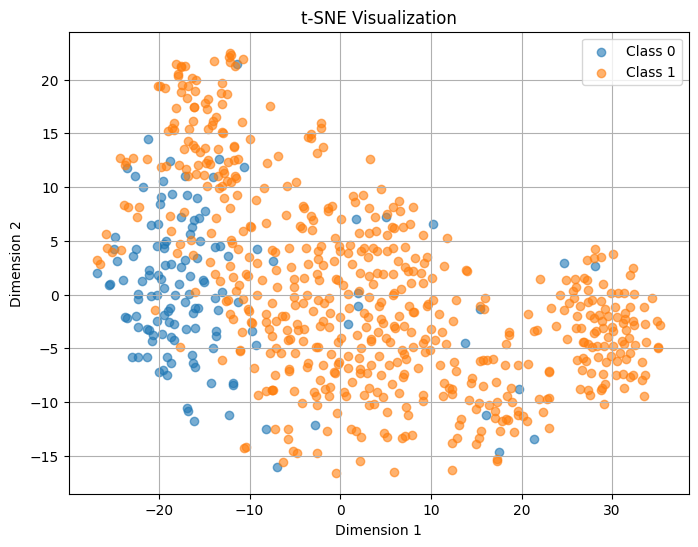

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X)

print(f"New shape after t-SNE: {X_embedded.shape}")

plt.figure(figsize=(8,6))

for label in np.unique(y):
    indices = y == label
    plt.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label=f"Class {label}", alpha=0.6)

plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)
plt.show()


## Reduced dimension plot using UMAP

/Users/aarefeen/miniconda3/envs/Z/lib/python3.8/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(
/Users/aarefeen/miniconda3/envs/Z/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


New shape after UMAP: (705, 2)


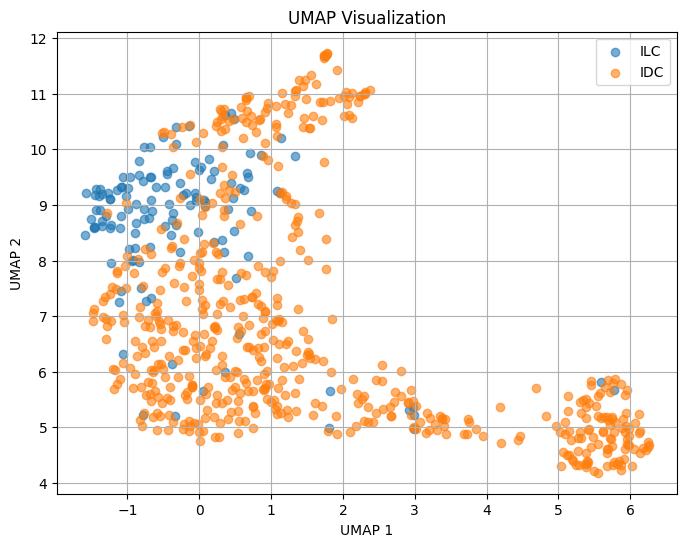

In [22]:
import umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)

X_umap = reducer.fit_transform(X)

print(f"New shape after UMAP: {X_umap.shape}")

plt.figure(figsize=(8,6))

label_names = ["ILC", "IDC"]

for label in np.unique(y):
    indices = y == label
    plt.scatter(X_umap[indices, 0], X_umap[indices, 1], label=label_names[label], alpha=0.6)


plt.title('UMAP Visualization')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.grid(True)
plt.show()


## Feature importance using SHAP

In [23]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.971830985915493


unclosed file <_io.BufferedReader name='/var/folders/jy/8wm65_kd10jfy5_9cbln_p_40000gr/T/tmpb5n69wd1/model.ubj'>


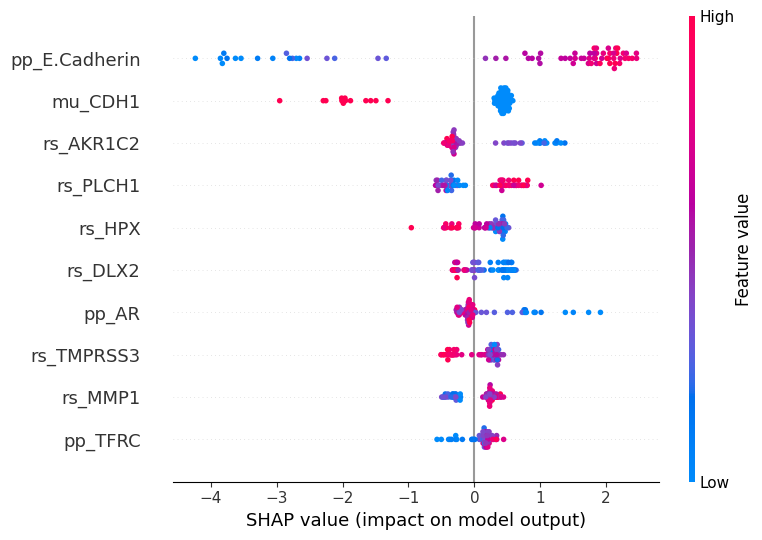

In [24]:
import shap

# Get SHAP values for the test set
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot for class 1 (binary classification - positive class)
shap.summary_plot(shap_values, X_test, max_display=10)